<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/practic/1.1/1.1_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Обнаружение фальшивых новостей

**Фальшивые новости** — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

**Твоя  задача** -  используя библиотеку *sklearn* построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (***REAL***） или фальшивой（***FAKE***).

Ты должен самостоятельно изучить и применить к задаче <code>TfidfVectorizer</code> для извлечения признаков из текстовых данных и <code>PassiveAggressiveClassifier</code>.

Ты  можешь использовать [данный датасет](https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv) для обучения.

- **Построй** матрицу ошибок (confusion matrix).
- **Представь**, что ваш заказчик очень любит графики и диаграммы.
- **Визуализируй** для него результаты там, где это возможно.

In [1]:
import pandas as pd

In [2]:
# Загрузка данных по URL
url = "https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv"
df = pd.read_csv(url)

# Просмотр первых строк
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# 2. Подготовка
df = df.dropna(subset=['text'])
if df['label'].dtype == 'object':
    df['label'] = df['label'].map({'REAL': 0, 'FAKE': 1})

# Просмотр первых строк
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [4]:
from sklearn.model_selection import train_test_split

# 3. Разделение
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 4. Векторизация
vec = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

print("Размер обучающей выборки:", X_train_vec.shape)
print("Размер тестовой выборки:", X_test_vec.shape)
print("Количество признаков:", X_train_vec.shape[1])
print("Пример признаков:", vec.get_feature_names_out()[:10])
print("Количество классов в обучающей выборке:", y_train.nunique())
print("Количество классов в тестовой выборке:", y_test.nunique())
print("Распределение классов в обучающей выборке:\n", y_train.value_counts(normalize=True))
print("Распределение классов в тестовой выборке:\n", y_test.value_counts(normalize=True))
print("Пример векторизованных данных (первые 5 строк):\n", X_train_vec[:5].toarray())

Размер обучающей выборки: (5068, 5000)
Размер тестовой выборки: (1267, 5000)
Количество признаков: 5000
Пример признаков: ['000' '000 emails' '000 people' '10' '10 000' '10 percent' '10 years'
 '100' '100 000' '11']
Количество классов в обучающей выборке: 2
Количество классов в тестовой выборке: 2
Распределение классов в обучающей выборке:
 label
0    0.500592
1    0.499408
Name: proportion, dtype: float64
Распределение классов в тестовой выборке:
 label
0    0.500395
1    0.499605
Name: proportion, dtype: float64
Пример векторизованных данных (первые 5 строк):
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04458826 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [6]:
from sklearn.linear_model import PassiveAggressiveClassifier

# 5. Обучение
model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

PassiveAggressiveClassifier(random_state=42)

In [7]:
from sklearn.metrics import classification_report

# 6. Оценка
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred, target_names=['REAL', 'FAKE']))

              precision    recall  f1-score   support

        REAL       0.93      0.92      0.93       634
        FAKE       0.92      0.93      0.93       633

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



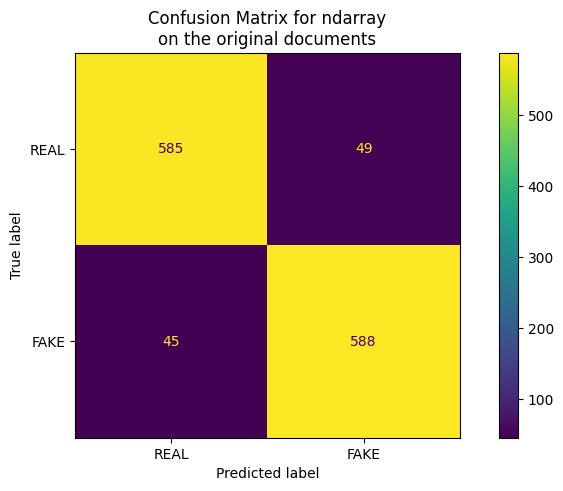

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(['REAL', 'FAKE'])
ax.yaxis.set_ticklabels(['REAL', 'FAKE'])
_ = ax.set_title(
    f"Confusion Matrix for {y_pred.__class__.__name__}\non the original documents"
)

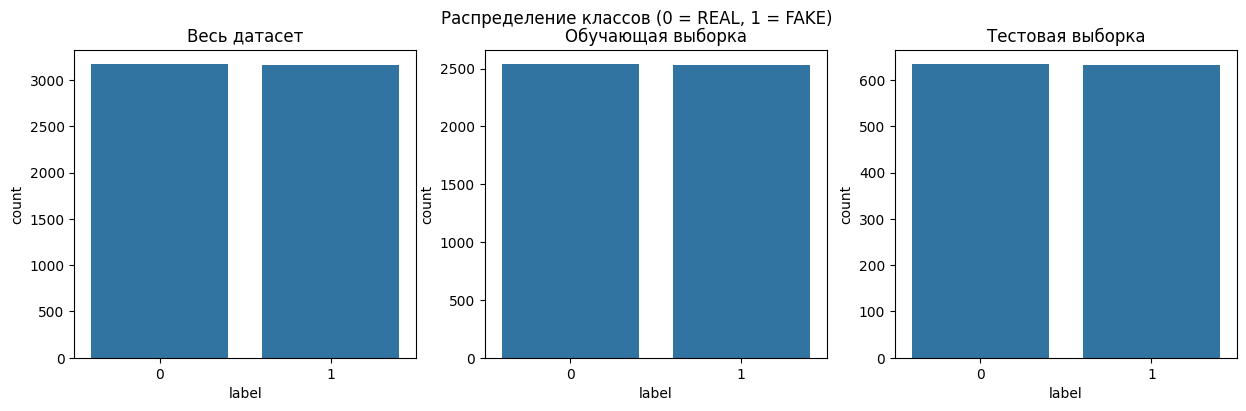

In [9]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(data=df, x='label', ax=axes[0])
axes[0].set_title('Весь датасет')

sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Обучающая выборка')

sns.countplot(x=y_test, ax=axes[2])
axes[2].set_title('Тестовая выборка')

plt.suptitle('Распределение классов (0 = REAL, 1 = FAKE)')
plt.show()

из графика выше видно, что данные во всех датасетах имеют равномерное распределение FAKE/REAL новостей

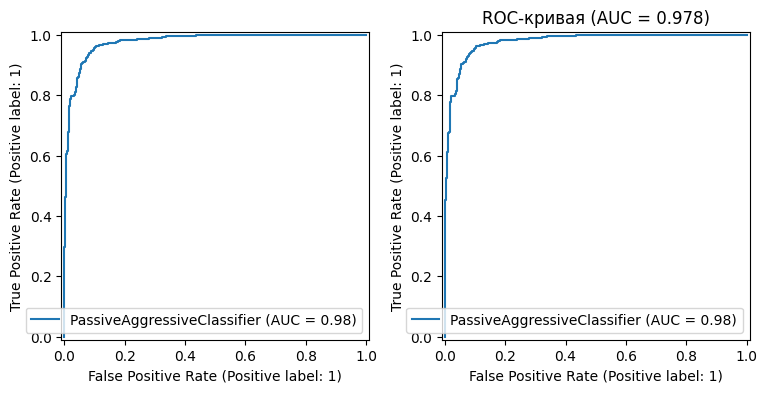

In [17]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(1,2,figsize=(9, 4))
RocCurveDisplay.from_estimator(model, X_test_vec, y_test, ax=ax[0])
plt.title('ROC-кривая (AUC = {:.3f})'.format(
    RocCurveDisplay.from_estimator(model, X_test_vec, y_test, ax=ax[1]).roc_auc
))
plt.show()

AUC 0.978 говорит нам об отличном качестве модели обучения

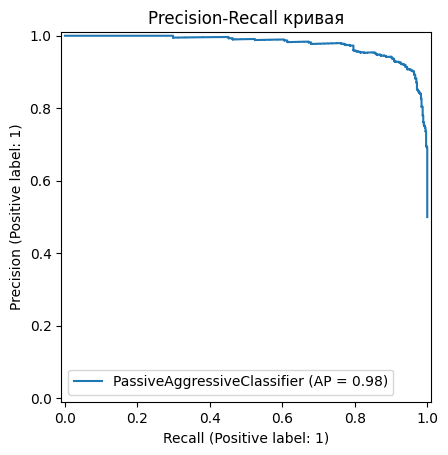

In [18]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model, X_test_vec, y_test)
plt.title('Precision-Recall кривая')
plt.show()

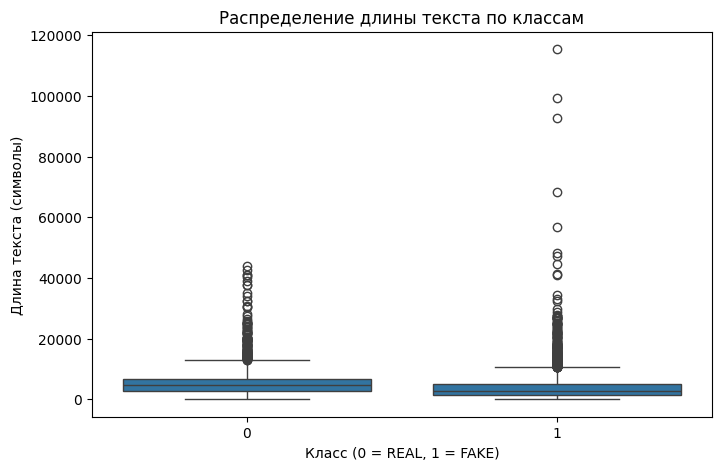

In [19]:
df['text_len'] = df['text'].str.len()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='text_len')
plt.title('Распределение длины текста по классам')
plt.xlabel('Класс (0 = REAL, 1 = FAKE)')
plt.ylabel('Длина текста (символы)')
plt.show()

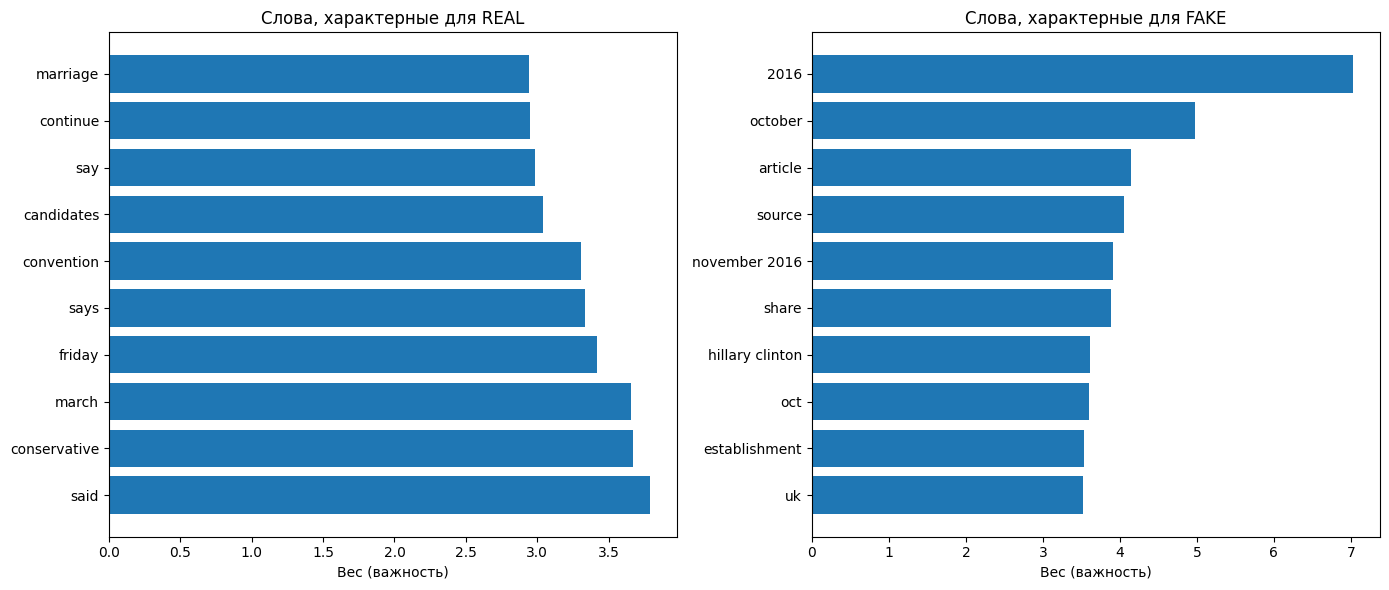

In [21]:
import numpy as np

feature_names = vec.get_feature_names_out()
coef = model.coef_[0]

# Топ-10 для FAKE (положительные коэффициенты)
top_fake_idx = np.argsort(coef)[-10:]
top_fake_words = [feature_names[i] for i in top_fake_idx]
top_fake_coef = coef[top_fake_idx]

# Топ-10 для REAL (отрицательные коэффициенты)
top_real_idx = np.argsort(coef)[:10]
top_real_words = [feature_names[i] for i in top_real_idx]
top_real_coef = coef[top_real_idx]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(top_real_words, -top_real_coef)  # инвертируем, чтобы было положительно
axes[0].set_title('Слова, характерные для REAL')
axes[0].set_xlabel('Вес (важность)')

axes[1].barh(top_fake_words, top_fake_coef)
axes[1].set_title('Слова, характерные для FAKE')
axes[1].set_xlabel('Вес (важность)')

plt.tight_layout()
plt.show()

по результатам график, можно предположить, что при ссылке на чьи то слова, об этом нам говорит популярность слов say, says, said, вероятность того что новость REAL на высоком уровне. в тоже время в фэйковых новостях чаще используют даты

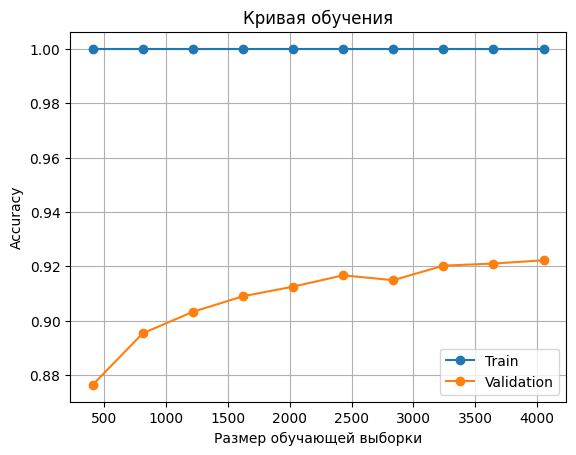

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_vec, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Accuracy')
plt.title('Кривая обучения')
plt.legend()
plt.grid(True)
plt.show()

график показывает, что с ростом обучающей выборки, точность предсказаний, в основном, растет. В то же время мы видим, что с ростом выборки падает скорость роста точность обучения.